In [1]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.9 MB/s eta 0:00:00


In [2]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os

# Ambil api token dari colab
api_token = userdata.get("Amunalji")

# Kita masukin token ke env var
os.environ["REPLICATE_API_TOKEN"] = api_token

In [3]:
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}


llm = Replicate(
  model="ibm-granite/granite-3.3-8b-instruct",
  input=parameters,
)

In [5]:
import pandas as pd
df = pd.read_csv("kompas_travel_articles.csv")
df

,title,content,date,category,url
0,Tiket Kereta Jakarta Yogyakarta Jelang Waisak ...,KOMPAS.com - Jelang perayaan Hari Raya Waisak ...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/2000...
1,"Enggak Perlu Antre, Bagaimana Pemeriksaan Imig...","JAKARTA, KOMPAS.com - Melancong ke luar negeri...",07/05/2025,Travelpedia,https://travel.kompas.com/read/2025/05/07/1850...
2,"Tolak GRIB Jaya, Ini Cara Warga Bali Memilih P...",KOMPAS.com - Keberadaan pecalang atau polisi a...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1814...
3,"Tugas Pecalang di Bali, Lebih dari Sekadar Men...",KOMPAS.com - Kehadiran organisasai masyarakat ...,07/05/2025,Travelpedia,https://travel.kompas.com/read/2025/05/07/1738...
4,Perhutani Larang Pendakian Tiga Gunung di Gugu...,"KOMPAS.com – Pendakian ke Gunung Saeng, Gunung...",07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1530...
...,...,...,...,...,...
995,Cara Daftar Mudik Gratis Pemprov DKI Jakarta 2...,KOMPAS.com - Pendaftaran mudik gratis 2025 Pem...,07/03/2025,Travel News,https://travel.kompas.com/read/2025/03/07/1728...
996,"Ngabuburit di Obelix Sea View, Nikmati Sunset ...",KOMPAS.com - Menunggu waktu berbuka akan lebih...,07/03/2025,Travel Ideas,https://travel.kompas.com/read/2025/03/07/1633...
997,"Liburan Edukatif di Cinangneng, Belajar Menari...",KOMPAS.com - Belajar budaya Sunda bisa dilakuk...,07/03/2025,Travel Ideas,https://travel.kompas.com/read/2025/03/07/1533...
998,"Kampoeng Wisata Cinangneng, Ajarkan Anak Gaya ...",\nKOMPAS.com - Liburan bukan hanya tentang ber...,07/03/2025,Travel Ideas,https://travel.kompas.com/read/2025/03/07/1503...


In [6]:
# Simpan 200 data pertama ke file CSV
df.head(10)

,title,content,date,category,url
0,Tiket Kereta Jakarta Yogyakarta Jelang Waisak ...,KOMPAS.com - Jelang perayaan Hari Raya Waisak ...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/2000...
1,"Enggak Perlu Antre, Bagaimana Pemeriksaan Imig...","JAKARTA, KOMPAS.com - Melancong ke luar negeri...",07/05/2025,Travelpedia,https://travel.kompas.com/read/2025/05/07/1850...
2,"Tolak GRIB Jaya, Ini Cara Warga Bali Memilih P...",KOMPAS.com - Keberadaan pecalang atau polisi a...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1814...
3,"Tugas Pecalang di Bali, Lebih dari Sekadar Men...",KOMPAS.com - Kehadiran organisasai masyarakat ...,07/05/2025,Travelpedia,https://travel.kompas.com/read/2025/05/07/1738...
4,Perhutani Larang Pendakian Tiga Gunung di Gugu...,"KOMPAS.com – Pendakian ke Gunung Saeng, Gunung...",07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1530...
5,"Jadwal KRL Manggarai-Bogor Hari Ini, Terakhir ...",KOMPAS.com - Jadwal KRL Manggarai-Bogor hari i...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1505...
6,"Jadwal KRL Tanah Abang-Cikarang Hari Ini, Tera...",KOMPAS.com - Bila hendak pulang naik kereta ke...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1454...
7,Jadwal Kereta Bandara Soekarno-Hatta dari Rawa...,KOMPAS.com - Bagi Anda yang hendak bepergian k...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1410...
8,"Indonesia Dapat Pedoman UN Tourism, Apa Pentin...","KOMPAS.com - Organisasi Pariwisata Dunia, UN T...",07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1334...
9,Intip Lokasi Pernikahan Maxime Bouttier dan Lu...,KOMPAS.com - Maxime Bouttier dan Luna Maya dik...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1302...


In [7]:
!pip install langchain-experimental


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 2.9 MB/s eta 0:00:00


In [8]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)
import pandas as pd

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,  # opt-in for Python REPL execution
)

In [14]:
# Menentukan kata kunci yang berkaitan dengan pariwisata
keywords  = [
    "wisata", "taman", "pantai", "gunung", "danau", "cagar", "museum", "religi",
    "kebun binatang", "air terjun", "monumen", "desa wisata", "kuliner", "petualangan",
    "resor", "penginapan", "hotel", "homestay", "travel", "pemandian air panas",
    "snorkeling", "diving", "rafting", "tracking", "hiking", "outbound", "budaya",
    "sejarah", "keraton", "kuil", "klenteng", "pura", "agrowisata", "camping", "glamping",
    "ekowisata", "pantai pasir putih", "bukit", "savana", "sunrise", "sunset",
    "tempat selfie", "spot foto", "kuliner lokal", "kafe instagramable", "transportasi wisata",
    "guide wisata", "paket tour", "obyek wisata", "wisata alam", "wisata edukasi",
    "wisata keluarga", "wisata anak", "wisata malam", "wisata belanja", "pusat oleh-oleh",
    "situs purbakala", "benteng", "galeri seni", "taman nasional", "taman hiburan",
    "pasar tradisional", "kapal wisata", "perahu wisata", "kerajinan tangan", "souvenir"
]


# Memfilter data berdasarkan judul atau konten yang mengandung kata kunci tersebut
df= df[df["title"].str.contains('|'.join(keywords), case=False, na=False) |
                    df["content"].str.contains('|'.join(keywords), case=False, na=False)].copy()

# Menampilkan beberapa data hasil filter
df


,title,content,date,category,url
0,Tiket Kereta Jakarta Yogyakarta Jelang Waisak ...,KOMPAS.com - Jelang perayaan Hari Raya Waisak ...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/2000...
1,"Enggak Perlu Antre, Bagaimana Pemeriksaan Imig...","JAKARTA, KOMPAS.com - Melancong ke luar negeri...",07/05/2025,Travelpedia,https://travel.kompas.com/read/2025/05/07/1850...
2,"Tolak GRIB Jaya, Ini Cara Warga Bali Memilih P...",KOMPAS.com - Keberadaan pecalang atau polisi a...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1814...
4,Perhutani Larang Pendakian Tiga Gunung di Gugu...,"KOMPAS.com – Pendakian ke Gunung Saeng, Gunung...",07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1530...
5,"Jadwal KRL Manggarai-Bogor Hari Ini, Terakhir ...",KOMPAS.com - Jadwal KRL Manggarai-Bogor hari i...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1505...
...,...,...,...,...,...
995,Cara Daftar Mudik Gratis Pemprov DKI Jakarta 2...,KOMPAS.com - Pendaftaran mudik gratis 2025 Pem...,07/03/2025,Travel News,https://travel.kompas.com/read/2025/03/07/1728...
996,"Ngabuburit di Obelix Sea View, Nikmati Sunset ...",KOMPAS.com - Menunggu waktu berbuka akan lebih...,07/03/2025,Travel Ideas,https://travel.kompas.com/read/2025/03/07/1633...
997,"Liburan Edukatif di Cinangneng, Belajar Menari...",KOMPAS.com - Belajar budaya Sunda bisa dilakuk...,07/03/2025,Travel Ideas,https://travel.kompas.com/read/2025/03/07/1533...
998,"Kampoeng Wisata Cinangneng, Ajarkan Anak Gaya ...",\nKOMPAS.com - Liburan bukan hanya tentang ber...,07/03/2025,Travel Ideas,https://travel.kompas.com/read/2025/03/07/1503...


In [15]:
# Memperketat filter hanya untuk destinasi wisata yang jelas
keywords_wisata = ["wisata", "taman", "pantai", "gunung", "danau", "cagar", "museum", "religi",
    "kebun binatang", "air terjun", "monumen", "desa wisata", "kuliner", "petualangan",
    "resor", "penginapan", "hotel", "homestay", "travel", "pemandian air panas",
    "snorkeling", "diving", "rafting", "tracking", "hiking", "outbound", "budaya",
    "sejarah", "keraton", "kuil", "klenteng", "pura", "agrowisata", "camping", "glamping",
    "ekowisata", "pantai pasir putih", "bukit", "savana", "sunrise", "sunset",
    "tempat selfie", "spot foto", "kuliner lokal", "kafe instagramable", "transportasi wisata",
    "guide wisata", "paket tour", "obyek wisata", "wisata alam", "wisata edukasi",
    "wisata keluarga", "wisata anak", "wisata malam", "wisata belanja", "pusat oleh-oleh",
    "situs purbakala", "benteng", "galeri seni", "taman nasional", "taman hiburan",
    "pasar tradisional", "kapal wisata", "perahu wisata", "kerajinan tangan", "souvenir"]

df_wisata= df[df["title"].str.contains('|'.join(keywords_wisata), case=False, na=False) |
               df["content"].str.contains('|'.join(keywords_wisata), case=False, na=False)].copy()

# Menambahkan kolom label berdasarkan kategori wisata
def classify_wisata(title):
    if any(word in title.lower() for word in ["masjid", "pura", "vihara","upacara","ziarah","makam","habib","ramadhan","religi",
                                              "sunan","candi","agama","islam","borobudur","al-qur'an","waisak","jemaah","ibadah",
                                              "kubah","gereja","patung","rosariao","mezbah","biara","meditasi","thirtha","haji",
                                              "umrah","doa","yasinan","istighosah","tahlilan","tadarus","misa","kelenteng"]):
        return "Wisata Religi"
    elif any(word in title.lower() for word in ["gunung", "pantai", "hutan", "sungai","air terjun","camping","dieng","baduy",
                                                "labuan bajo","ancol","taman nasional","gunung bromo","raja ampat","pulau komodo",
                                                "tanjung puting","kawah ijen","semeru","merapi","rinjani","taman laut","taman safari",
                                                "suaka margasatwa","goa","cagar alam","danau","terumbu karang","pesisir","sabana",
                                                "bukit","lembah","padang rumput","perkemahan","savana","mangrove","sumber air panas"]):
        return "Wisata Alam"
    elif any(word in title.lower() for word in ["taman bermain","museum","kebun binatang", "monumen", "pusat perbelanjaan","hotel",
                                                "restoran","waterpark","theme park","galeri seni","taman kota","gedung konser",
                                                "teater","sirkus","kebun raya","taman bunga","kolam renang","kebun teh","kebun kopi",
                                                "jembatan","stadion","arena olahraga","perpustakaan","bioskop","pusat sains","observatorium",
                                                "taman hiburan","taman edukasi","pameran","galeri","pusat kerajinan","toko suvenir",
                                                "spa","resort","lapangan golf"]):
        return "Wisata Buatan"
    else:
        return "Lainnya"

df_wisata["label"] = df_wisata["title"].apply(classify_wisata)

# Filter out rows with label as None
df_wisata = df_wisata.dropna(subset=['label'])

df_wisata = df_wisata.reset_index(drop=True)

# Menyimpan hasil ke CSV baru
output_path = "pariwisata_filtered.csv"
df_wisata.to_csv(output_path, index=False)

# Menampilkan beberapa hasil
df_wisata


,title,content,date,category,url,label
0,Tiket Kereta Jakarta Yogyakarta Jelang Waisak ...,KOMPAS.com - Jelang perayaan Hari Raya Waisak ...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/2000...,Wisata Religi
1,"Enggak Perlu Antre, Bagaimana Pemeriksaan Imig...","JAKARTA, KOMPAS.com - Melancong ke luar negeri...",07/05/2025,Travelpedia,https://travel.kompas.com/read/2025/05/07/1850...,Lainnya
2,"Tolak GRIB Jaya, Ini Cara Warga Bali Memilih P...",KOMPAS.com - Keberadaan pecalang atau polisi a...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1814...,Lainnya
3,Perhutani Larang Pendakian Tiga Gunung di Gugu...,"KOMPAS.com – Pendakian ke Gunung Saeng, Gunung...",07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1530...,Wisata Alam
4,"Jadwal KRL Manggarai-Bogor Hari Ini, Terakhir ...",KOMPAS.com - Jadwal KRL Manggarai-Bogor hari i...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1505...,Lainnya
...,...,...,...,...,...,...
844,Cara Daftar Mudik Gratis Pemprov DKI Jakarta 2...,KOMPAS.com - Pendaftaran mudik gratis 2025 Pem...,07/03/2025,Travel News,https://travel.kompas.com/read/2025/03/07/1728...,Lainnya
845,"Ngabuburit di Obelix Sea View, Nikmati Sunset ...",KOMPAS.com - Menunggu waktu berbuka akan lebih...,07/03/2025,Travel Ideas,https://travel.kompas.com/read/2025/03/07/1633...,Lainnya
846,"Liburan Edukatif di Cinangneng, Belajar Menari...",KOMPAS.com - Belajar budaya Sunda bisa dilakuk...,07/03/2025,Travel Ideas,https://travel.kompas.com/read/2025/03/07/1533...,Lainnya
847,"Kampoeng Wisata Cinangneng, Ajarkan Anak Gaya ...",\nKOMPAS.com - Liburan bukan hanya tentang ber...,07/03/2025,Travel Ideas,https://travel.kompas.com/read/2025/03/07/1503...,Lainnya


In [16]:
df_wisata[['title', 'content', 'label']]

,title,content,label
0,Tiket Kereta Jakarta Yogyakarta Jelang Waisak ...,KOMPAS.com - Jelang perayaan Hari Raya Waisak ...,Wisata Religi
1,"Enggak Perlu Antre, Bagaimana Pemeriksaan Imig...","JAKARTA, KOMPAS.com - Melancong ke luar negeri...",Lainnya
2,"Tolak GRIB Jaya, Ini Cara Warga Bali Memilih P...",KOMPAS.com - Keberadaan pecalang atau polisi a...,Lainnya
3,Perhutani Larang Pendakian Tiga Gunung di Gugu...,"KOMPAS.com – Pendakian ke Gunung Saeng, Gunung...",Wisata Alam
4,"Jadwal KRL Manggarai-Bogor Hari Ini, Terakhir ...",KOMPAS.com - Jadwal KRL Manggarai-Bogor hari i...,Lainnya
...,...,...,...
844,Cara Daftar Mudik Gratis Pemprov DKI Jakarta 2...,KOMPAS.com - Pendaftaran mudik gratis 2025 Pem...,Lainnya
845,"Ngabuburit di Obelix Sea View, Nikmati Sunset ...",KOMPAS.com - Menunggu waktu berbuka akan lebih...,Lainnya
846,"Liburan Edukatif di Cinangneng, Belajar Menari...",KOMPAS.com - Belajar budaya Sunda bisa dilakuk...,Lainnya
847,"Kampoeng Wisata Cinangneng, Ajarkan Anak Gaya ...",\nKOMPAS.com - Liburan bukan hanya tentang ber...,Lainnya


In [17]:
# prompt: coba isntal sastrawi

!pip install Sastrawi==1.0.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [18]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Download tokenizer
nltk.download('punkt')

# Inisialisasi stemmer dan stopword remover
stemmer = StemmerFactory().create_stemmer()
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()

# Kata-kata noise yang ingin dibuang
noise_words = [
    'breaking', 'news', 'lihat', 'this', 'post', 'instagram',
    'whatsapp', 'channel', 'smash', 'travel', 'langsung', 'pilih', 'install', 'aplikasi', 'berita', 'baca', 'kompas.com'
]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
# Fungsi cleaning
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Hapus URL
    for noise in noise_words:
        text = text.replace(noise, '')  # Hapus noise words
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Hanya huruf dan spasi
    text = re.sub(r"\s+", " ", text)  # Hapus spasi berlebih
    text = re.sub(r"KOMPAScom", " ", text)
    return text.strip()

# Terapkan cleaning ke kolom 'judul' dan 'konten'
df_wisata['judul_cleaned'] = df_wisata['title'].apply(clean_text)
df_wisata['konten_cleaned'] = df_wisata['content'].apply(clean_text)

# Tampilkan hasil 5 data pertama
df_wisata[['title', 'judul_cleaned']].head()
df_wisata[['content', 'konten_cleaned']].head()


,content,konten_cleaned
0,KOMPAS.com - Jelang perayaan Hari Raya Waisak ...,Jelang perayaan Hari Raya Waisak di Candi Boro...
1,"JAKARTA, KOMPAS.com - Melancong ke luar negeri...",JAKARTA Melancong ke luar negeri tidak hanya...
2,KOMPAS.com - Keberadaan pecalang atau polisi a...,Keberadaan pecalang atau polisi adat di Bali m...
3,"KOMPAS.com – Pendakian ke Gunung Saeng, Gunung...",Pendakian ke Gunung Saeng Gunung Piramid dan G...
4,KOMPAS.com - Jadwal KRL Manggarai-Bogor hari i...,Jadwal KRL ManggaraiBogor hari ini Rabu bisa d...


In [20]:
def case_folding(text):
    return text.lower()

# Terapkan case folding ke hasil cleaned sebelumnya
df_wisata['judul_casefolded'] = df_wisata['judul_cleaned'].apply(case_folding)
df_wisata['konten_casefolded'] = df_wisata['konten_cleaned'].apply(case_folding)

# Tampilkan hasil 5 data pertama
df_wisata[['judul_cleaned', 'judul_casefolded']]
df_wisata[['konten_cleaned', 'konten_casefolded']]


,konten_cleaned,konten_casefolded
0,Jelang perayaan Hari Raya Waisak di Candi Boro...,jelang perayaan hari raya waisak di candi boro...
1,JAKARTA Melancong ke luar negeri tidak hanya...,jakarta melancong ke luar negeri tidak hanya...
2,Keberadaan pecalang atau polisi adat di Bali m...,keberadaan pecalang atau polisi adat di bali m...
3,Pendakian ke Gunung Saeng Gunung Piramid dan G...,pendakian ke gunung saeng gunung piramid dan g...
4,Jadwal KRL ManggaraiBogor hari ini Rabu bisa d...,jadwal krl manggaraibogor hari ini rabu bisa d...
...,...,...
844,Pendaftaran mudik gratis Pemerintah Provinsi P...,pendaftaran mudik gratis pemerintah provinsi p...
845,Menunggu waktu berbuka akan lebih seru dengan ...,menunggu waktu berbuka akan lebih seru dengan ...
846,Belajar budaya Sunda bisa dilakukan sambil ber...,belajar budaya sunda bisa dilakukan sambil ber...
847,Liburan bukan hanya tentang bersenangsenang ta...,liburan bukan hanya tentang bersenangsenang ta...


In [21]:
# Fungsi stopword removal
def remove_stopwords(text):
    return stopword_remover.remove(text)

# Terapkan stopword removal ke hasil casefolded
df_wisata['judul_nostop'] = df_wisata['judul_casefolded'].apply(remove_stopwords)
df_wisata['konten_nostop'] = df_wisata['konten_casefolded'].apply(remove_stopwords)

# Tampilkan hasil 5 data pertama
df_wisata[['judul_casefolded', 'judul_nostop']]
df_wisata[['konten_casefolded', 'konten_nostop']]


,konten_casefolded,konten_nostop
0,jelang perayaan hari raya waisak di candi boro...,jelang perayaan hari raya waisak candi borobud...
1,jakarta melancong ke luar negeri tidak hanya...,jakarta melancong luar negeri hanya dilakuka...
2,keberadaan pecalang atau polisi adat di bali m...,keberadaan pecalang polisi adat bali menjadi a...
3,pendakian ke gunung saeng gunung piramid dan g...,pendakian gunung saeng gunung piramid gunung g...
4,jadwal krl manggaraibogor hari ini rabu bisa d...,jadwal krl manggaraibogor hari rabu disimak pe...
...,...,...
844,pendaftaran mudik gratis pemerintah provinsi p...,pendaftaran mudik gratis pemerintah provinsi p...
845,menunggu waktu berbuka akan lebih seru dengan ...,menunggu waktu berbuka lebih seru suasana pant...
846,belajar budaya sunda bisa dilakukan sambil ber...,belajar budaya sunda dilakukan berlibur alam k...
847,liburan bukan hanya tentang bersenangsenang ta...,liburan bukan tentang bersenangsenang belajar ...


In [23]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
def tokenize(text):
    return word_tokenize(text)

# Terapkan tokenisasi
df_wisata['judul_tokens'] = df_wisata['judul_nostop'].apply(tokenize)
df_wisata['konten_tokens'] = df_wisata['konten_nostop'].apply(tokenize)

# Tampilkan hasil 5 data pertama
df_wisata[['judul_nostop', 'judul_tokens']]
df_wisata[['konten_nostop', 'konten_tokens']]


,konten_nostop,konten_tokens
0,jelang perayaan hari raya waisak candi borobud...,"[jelang, perayaan, hari, raya, waisak, candi, ..."
1,jakarta melancong luar negeri hanya dilakuka...,"[jakarta, melancong, luar, negeri, hanya, dila..."
2,keberadaan pecalang polisi adat bali menjadi a...,"[keberadaan, pecalang, polisi, adat, bali, men..."
3,pendakian gunung saeng gunung piramid gunung g...,"[pendakian, gunung, saeng, gunung, piramid, gu..."
4,jadwal krl manggaraibogor hari rabu disimak pe...,"[jadwal, krl, manggaraibogor, hari, rabu, disi..."
...,...,...
844,pendaftaran mudik gratis pemerintah provinsi p...,"[pendaftaran, mudik, gratis, pemerintah, provi..."
845,menunggu waktu berbuka lebih seru suasana pant...,"[menunggu, waktu, berbuka, lebih, seru, suasan..."
846,belajar budaya sunda dilakukan berlibur alam k...,"[belajar, budaya, sunda, dilakukan, berlibur, ..."
847,liburan bukan tentang bersenangsenang belajar ...,"[liburan, bukan, tentang, bersenangsenang, bel..."


In [25]:
def stemming(tokens):
    return " ".join([stemmer.stem(token) for token in tokens])

# Terapkan stemming
df_wisata['judul_stemmed'] = df_wisata['judul_tokens'].apply(stemming)
df_wisata['konten_stemmed'] = df_wisata['konten_tokens'].apply(stemming)

# Tampilkan hasil 5 data pertama
df_wisata[['judul_tokens', 'judul_stemmed']]
df_wisata[['konten_tokens', 'konten_stemmed']]

,konten_tokens,konten_stemmed
0,"[jelang, perayaan, hari, raya, waisak, candi, ...",jelang raya hari raya waisak candi borobudur m...
1,"[jakarta, melancong, luar, negeri, hanya, dila...",jakarta lancong luar negeri hanya laku lalu pe...
2,"[keberadaan, pecalang, polisi, adat, bali, men...",ada calang polisi adat bal jadi alas kuat tola...
3,"[pendakian, gunung, saeng, gunung, piramid, gu...",daki gunung saeng gunung piramid gunung gulgul...
4,"[jadwal, krl, manggaraibogor, hari, rabu, disi...",jadwal krl manggaraibogor hari rabu simak laku...
...,...,...
844,"[pendaftaran, mudik, gratis, pemerintah, provi...",daftar mudik gratis perintah provinsi pemprov ...
845,"[menunggu, waktu, berbuka, lebih, seru, suasan...",tunggu waktu buka lebih seru suasana pantai ob...
846,"[belajar, budaya, sunda, dilakukan, berlibur, ...",ajar budaya sunda laku libur alam kampoeng wis...
847,"[liburan, bukan, tentang, bersenangsenang, bel...",libur bukan tentang bersenangsenang ajar baru ...


In [27]:
# Simpan hasil stemming ke kolom yang akan digunakan untuk file final
df_wisata['judul_processed'] = df_wisata['judul_stemmed']
df_wisata['konten_processed'] = df_wisata['konten_stemmed']

# Simpan file final dengan kolom yang sudah diproses
final_path = "pariwisata_processed.csv"
df_wisata.to_csv(final_path, index=False)


In [28]:
import pandas as pd

# Ganti 'nama_file.csv' dengan nama file CSV Anda
df_wisata = pd.read_csv('pariwisata_processed.csv')

# Tampilkan beberapa baris pertama dari DataFrame
df_wisata[['judul_processed', 'konten_processed', 'label']]

,judul_processed,konten_processed,label
0,tiket kereta jakarta yogyakarta jelang waisak ...,jelang raya hari raya waisak candi borobudur m...,Wisata Religi
1,enggak perlu antre bagaimana periksa imigrasi ...,jakarta lancong luar negeri hanya laku lalu pe...,Lainnya
2,tolak grib jaya cara warga bal pilih calang ja...,ada calang polisi adat bal jadi alas kuat tola...,Lainnya
3,hutan larang daki tiga gunung gugus gunung arg...,daki gunung saeng gunung piramid gunung gulgul...,Wisata Alam
4,jadwal krl manggaraibogor hari akhir wib,jadwal krl manggaraibogor hari rabu simak laku...,Lainnya
...,...,...,...
844,cara daftar mudik gratis pemprov dki jakarta b...,daftar mudik gratis perintah provinsi pemprov ...,Lainnya
845,ngabuburit obelix sea view nikmat sunset tari,tunggu waktu buka lebih seru suasana pantai ob...,Lainnya
846,libur edukatif cinangneng ajar tari gamelan,ajar budaya sunda laku libur alam kampoeng wis...,Lainnya
847,kampoeng wisata cinangneng ajar anak gaya hidu...,libur bukan tentang bersenangsenang ajar baru ...,Lainnya


Persebaran Data Wisata:
label
Lainnya          592
Wisata Alam      128
Wisata Buatan     87
Wisata Religi     42
Name: count, dtype: int64


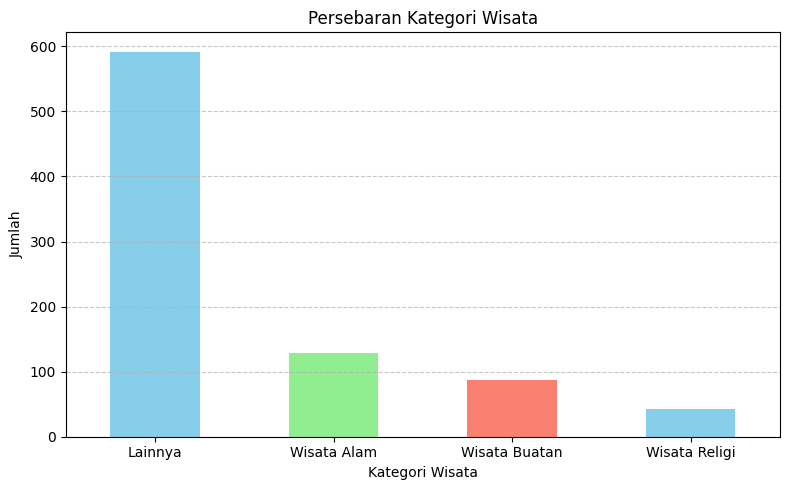

In [29]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing label
label_counts = df_wisata['label'].value_counts()

# Cetak total setiap kategori
print("Persebaran Data Wisata:")
print(label_counts)

# Diagram batang
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Persebaran Kategori Wisata')
plt.xlabel('Kategori Wisata')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
import pandas as pd
import os
from langchain_community.llms import Replicate
from google.colab import userdata

# Ambil token dari userdata
api_token = userdata.get("Amunalji")
os.environ["REPLICATE_API_TOKEN"] = api_token

# Parameter untuk IBM Granite via LangChain Replicate wrapper
parameters = {
    "top_k": 5,
    "top_p": 1.0,
    "max_tokens": 4096,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "temperature": 0.7,
    "stopping_criteria": "length (256 tokens)",
    "stopping_sequence": None
}

# Inisialisasi LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=parameters,
)

# Fungsi klasifikasi dengan LLM LangChain
def classify_tourism(text):
    prompt = (
        "Klasifikasikan teks berikut ke dalam salah satu kategori: wisata alam, wisata buatan, wisata religi, atau lainnya.\n"
        f"Teks: \"{text}\"\nKategori:"
    )
    try:
        output = llm.invoke(prompt)
        print(f"[DEBUG] Prompt:\n{prompt}")
        print(f"[DEBUG] Output:\n{output}")

        result = output.strip().lower()
        valid_labels = ["wisata alam", "wisata buatan", "wisata religi", "lainnya"]
        for label in valid_labels:
            if label in result:
                return label.capitalize()
        return "Lainnya"
    except Exception as e:
        print(f"[ERROR] {e}")
        return "Error"

# Load dataset
df = pd.read_csv("pariwisata_processed.csv")

# Terapkan klasifikasi
df['kategori_pariwisata'] = df['konten_processed'].apply(classify_tourism)

# Simpan hasil
output_file = "analysis_with_ibm_granite.csv"
df.to_csv(output_file, index=False)

# Tampilkan hasil contoh
print(df[['konten_processed', 'kategori_pariwisata']].head())
print(f"\n✅ Hasil klasifikasi disimpan di: {output_file}")


Streaming output truncated to the last 5000 lines.
[DEBUG] Prompt:
Klasifikasikan teks berikut ke dalam salah satu kategori: wisata alam, wisata buatan, wisata religi, atau lainnya.
Teks: "efisiensi anggar perintah dampak signifikan industri pariwisata indonesia masuk akomodasi tingkat okupansi hotel bintang indonesia periode januari februari alami turun besar persen poin pada februari turun besar persen poin baca dalam audiensi pimpin pusat himpun hotel restoran indonesia phri menteri pariwisata widiyanti putri wardhana sampai salah satu laku maksimal potensi wisatawan nusantara wisnus cipta pasar baru paham adaptasi hadap situasi milik tantang sendiri kami me halhal eksplorasi sama kembang pariwisata depan ujar menteri pariwisata widiyanti putri lewat terang resmi kutip kamis dok menteri pariwisata ketua umum himpun hotel restoran indonesia phri hariyadi sukamdani kiri menteri pariwisata widiyanti putri wardhana kanan audiensi jakarta pusat rabu menteri pariwisata widiyanti putri mak

In [46]:
import pandas as pd
dataset = "analysis_with_ibm_granite.csv"
view = pd.read_csv(dataset)
view


,title,content,date,category,url,label,judul_cleaned,konten_cleaned,judul_casefolded,konten_casefolded,judul_nostop,konten_nostop,judul_tokens,konten_tokens,judul_stemmed,konten_stemmed,judul_processed,konten_processed,kategori_pariwisata
0,Tiket Kereta Jakarta Yogyakarta Jelang Waisak ...,KOMPAS.com - Jelang perayaan Hari Raya Waisak ...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/2000...,Wisata Religi,Tiket Kereta Jakarta Yogyakarta Jelang Waisak ...,Jelang perayaan Hari Raya Waisak di Candi Boro...,tiket kereta jakarta yogyakarta jelang waisak ...,jelang perayaan hari raya waisak di candi boro...,tiket kereta jakarta yogyakarta jelang waisak ...,jelang perayaan hari raya waisak candi borobud...,"['tiket', 'kereta', 'jakarta', 'yogyakarta', '...","['jelang', 'perayaan', 'hari', 'raya', 'waisak...",tiket kereta jakarta yogyakarta jelang waisak ...,jelang raya hari raya waisak candi borobudur m...,tiket kereta jakarta yogyakarta jelang waisak ...,jelang raya hari raya waisak candi borobudur m...,Wisata religi
1,"Enggak Perlu Antre, Bagaimana Pemeriksaan Imig...","JAKARTA, KOMPAS.com - Melancong ke luar negeri...",07/05/2025,Travelpedia,https://travel.kompas.com/read/2025/05/07/1850...,Lainnya,Enggak Perlu Antre Bagaimana Pemeriksaan Imigr...,JAKARTA Melancong ke luar negeri tidak hanya...,enggak perlu antre bagaimana pemeriksaan imigr...,jakarta melancong ke luar negeri tidak hanya...,enggak perlu antre bagaimana pemeriksaan imigr...,jakarta melancong luar negeri hanya dilakuka...,"['enggak', 'perlu', 'antre', 'bagaimana', 'pem...","['jakarta', 'melancong', 'luar', 'negeri', 'ha...",enggak perlu antre bagaimana periksa imigrasi ...,jakarta lancong luar negeri hanya laku lalu pe...,enggak perlu antre bagaimana periksa imigrasi ...,jakarta lancong luar negeri hanya laku lalu pe...,Wisata buatan
2,"Tolak GRIB Jaya, Ini Cara Warga Bali Memilih P...",KOMPAS.com - Keberadaan pecalang atau polisi a...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1814...,Lainnya,Tolak GRIB Jaya Ini Cara Warga Bali Memilih Pe...,Keberadaan pecalang atau polisi adat di Bali m...,tolak grib jaya ini cara warga bali memilih pe...,keberadaan pecalang atau polisi adat di bali m...,tolak grib jaya cara warga bali memilih pecala...,keberadaan pecalang polisi adat bali menjadi a...,"['tolak', 'grib', 'jaya', 'cara', 'warga', 'ba...","['keberadaan', 'pecalang', 'polisi', 'adat', '...",tolak grib jaya cara warga bal pilih calang ja...,ada calang polisi adat bal jadi alas kuat tola...,tolak grib jaya cara warga bal pilih calang ja...,ada calang polisi adat bal jadi alas kuat tola...,Wisata religi
3,Perhutani Larang Pendakian Tiga Gunung di Gugu...,"KOMPAS.com – Pendakian ke Gunung Saeng, Gunung...",07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1530...,Wisata Alam,Perhutani Larang Pendakian Tiga Gunung di Gugu...,Pendakian ke Gunung Saeng Gunung Piramid dan G...,perhutani larang pendakian tiga gunung di gugu...,pendakian ke gunung saeng gunung piramid dan g...,perhutani larang pendakian tiga gunung gugusan...,pendakian gunung saeng gunung piramid gunung g...,"['perhutani', 'larang', 'pendakian', 'tiga', '...","['pendakian', 'gunung', 'saeng', 'gunung', 'pi...",hutan larang daki tiga gunung gugus gunung arg...,daki gunung saeng gunung piramid gunung gulgul...,hutan larang daki tiga gunung gugus gunung arg...,daki gunung saeng gunung piramid gunung gulgul...,Wisata alam
4,"Jadwal KRL Manggarai-Bogor Hari Ini, Terakhir ...",KOMPAS.com - Jadwal KRL Manggarai-Bogor hari i...,07/05/2025,Travel News,https://travel.kompas.com/read/2025/05/07/1505...,Lainnya,Jadwal KRL ManggaraiBogor Hari Ini Terakhir WIB,Jadwal KRL ManggaraiBogor hari ini Rabu bisa d...,jadwal krl manggaraibogor hari ini terakhir wib,jadwal krl manggaraibogor hari ini rabu bisa d...,jadwal krl manggaraibogor hari terakhir wib,jadwal krl manggaraibogor hari rabu disimak pe...,"['jadwal', 'krl', 'manggaraibogor', 'hari', 't...","['jadwal', 'krl', '

In [44]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# 1. Load hasil dataset dengan prediksi
file_path = 'analysis_with_ibm_granite.csv'
df = pd.read_csv(file_path)

# 2. Normalisasi label ke huruf kecil
df['label'] = df['label'].str.lower()  # kolom label asli
df['kategori_pariwisata'] = df['kategori_pariwisata'].str.lower()

# 3. Validasi label hanya yang valid
valid_labels = ['wisata alam', 'wisata buatan', 'wisata religi', 'lainnya']
df = df[
    df['label'].isin(valid_labels) &
    df['kategori_pariwisata'].isin(valid_labels)
]

# 4. Hitung akurasi
accuracy = accuracy_score(df['label'], df['kategori_pariwisata'])
print(f"Akurasi Model: {accuracy * 100:.2f}%")

# 5. Tampilkan classification report
print("\nClassification Report:")
print(classification_report(df['label'], df['kategori_pariwisata']))


Akurasi Model: 24.50%

Classification Report:
               precision    recall  f1-score   support

      lainnya       0.79      0.08      0.14       592
  wisata alam       0.22      0.85      0.34       128
wisata buatan       0.15      0.41      0.22        87
wisata religi       0.37      0.40      0.39        42

     accuracy                           0.24       849
    macro avg       0.38      0.44      0.27       849
 weighted avg       0.62      0.24      0.19       849



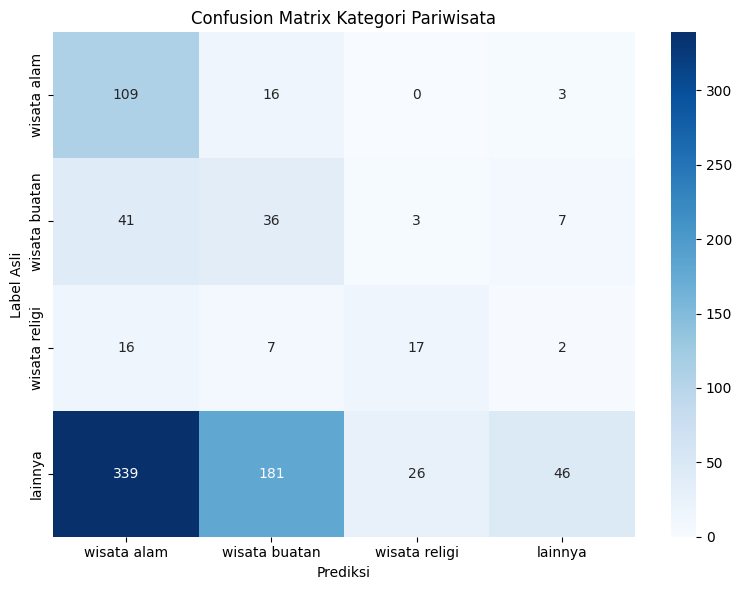

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Load data hasil prediksi
df = pd.read_csv('analysis_with_ibm_granite.csv')

# 2. Normalisasi label
df['label'] = df['label'].str.lower()
df['kategori_pariwisata'] = df['kategori_pariwisata'].str.lower()

# 3. Filter hanya label yang valid
valid_labels = ['wisata alam', 'wisata buatan', 'wisata religi', 'lainnya']
df = df[
    df['label'].isin(valid_labels) &
    df['kategori_pariwisata'].isin(valid_labels)
]

# 4. Hitung confusion matrix
cm = confusion_matrix(df['label'], df['kategori_pariwisata'], labels=valid_labels)

# 5. Buat visualisasi
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=valid_labels,
            yticklabels=valid_labels)
plt.xlabel('Prediksi')
plt.ylabel('Label Asli')
plt.title('Confusion Matrix Kategori Pariwisata')
plt.tight_layout()
plt.show()
